## Instruções para uso das funções de teste de hipótese

Nas 4 células ocultas abaixo estão os códigos das funções:

* `TH_media_z`: Função para teste de hipótese da média populacional $\mu$, com nível de significância $\alpha$, supondo desvio padrão populacional $\sigma$ conhecido (uso do valor-p).
    
* `TH_media_z_regiao`: Idem anterior, porém utilizando as regiões de rejeição como critério de decisão.

* `TH_media_t`: Função para teste de hipótese da média $\mu$, com nível de significância $\alpha$, supondo desvio padrão populacional $\sigma$ desconhecido.

* `TH_vardp_chi2`: Função para teste de hipótese da variância $\sigma^2$ ou do desvio padrão $\sigma$ populacionais, com nível de significância $\alpha$.

**IMPORTANTE:** Execute as células ocultas! Não é necessário visualizá-las para que as funçõe sestejam disponíveis para uso. Entertanto, caso deseje verificar os códigos, clique no triângulo preto que antedece o título "Instruções para uso das funções de teste de hipótese".

In [ ]:
def TH_media_z(x_barra=None, n_amostras=None, mu=None,
               sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - p_valor: valor p do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição amostral das médias
  dist_amostras = st.norm(loc=mu, scale=sigma/n_amostras**0.5)

  # Cálculo do p-valor, de acordo com o tipo de teste
  if teste == 'esquerda':
    p_valor = dist_amostras.cdf(x_barra)
    tipo = 'unilateral à esquerda'
  elif teste == 'direita':
    p_valor = dist_amostras.sf(x_barra)
    tipo = 'unilateral à direita'
  elif teste == 'bilateral':
    p_valor =  2*abs(dist_amostras.cdf(x_barra))
    tipo = 'bilateral'

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
    print(f'Teste {tipo} com p-valor = {p_valor:.6f}')
    if p_valor <= alpha:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return p_valor

In [ ]:
def TH_media_z_regiao(x_barra=None, n_amostras=None, mu=None,
                      sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - z0: valor z crítico do teste de hipótese (fronteira da região de rejeição)'''

  from scipy import stats as st

  # Criação da distribuição normal padrão
  dist_padrao = st.norm(loc=0, scale=1)

  # Cálculo da estatística de teste padronizada
  z = (x_barra-mu)/(sigma/n_amostras**0.5)

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do z crítico, de acordo com o tipo de teste
  if teste == 'esquerda':
    z0 = dist_padrao.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if z <= z0:
      rejeicao = True
  elif teste == 'direita':
    z0 = dist_padrao.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if z >= z0:
      rejeicao = True
  elif teste == 'bilateral':
    z0 = dist_padrao.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de z à região de rejeição
    if (z <= z0) or (z >= -z0):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
     print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
     print(f'Teste {tipo} com z0 = {z0:.6f}')
     if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
     else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return z0

In [ ]:
def TH_media_t(x_barra=None, n_amostras=None, mu=None, s=None,
               alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média mu, com nível de significância
     alpha, supondo desvio padrão populacional sigma desconhecido.
     ENTRADA:
     - x_barra: média amostral
     - n_amostras: número de amostras coletadas no experimento
     - mu: hipótese nula para a média populacional
     - s: desvio padrão amostral
     - alpha: nível de significância adotado no teste (valor default 0.05)
     - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
     para teste unilateral à esquerda, 'direita', para teste unilateral à direita
     e 'bilateral' para teste bilateral (valor default 'esquerda')
     - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
     (valor default=True)
     SAÍDA:
     - relatório de conclusão do teste de hipótese, caso cocnlusao=True
     - t0: valor crítico do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição t
  dist_t = st.t(df=n_amostras-1)

  # Cálculo da estatística de teste padronizada
  t = (x_barra-mu)/(s/n_amostras**0.5)

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do t crítico (t0), de acordo com o tipo de teste
  if teste == 'esquerda':
    t0 = dist_t.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de t à região de rejeição
    if t <= t0:
      rejeicao = True
  elif teste == 'direita':
    t0 = dist_t.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de t à região de rejeição
    if t >= t0:
      rejeicao = True
  elif teste == 'bilateral':
    t0 = dist_t.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de t à região de rejeição
    if (t <= t0) or (t >= -t0):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***')
    print(f'Teste {tipo} com t0 = {t0:.5f}')
    if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return t0

In [ ]:
def TH_vardp_chi2(est_amostral=None, n_amostras=None, val_parametro=None,
                  parametro='sigma', alpha=0.05, teste='esquerda',
                  conclusao=True):
  '''Função para teste de hipótese da variância ou do desvio padrão populacional,
  com nível de significância alpha.
  ENTRADA:
  - est_amostral: variância ou desvio padrão amostral
  - n_amostras: número de amostras coletadas no experimento
  - val_parametro = valor a ser testado, seja variância ou desvio padrão
  - parametro = 'sigma2' para teste de variância e 'sigma' para teste de
  desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAÍDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - chi2: valor da estatística padronizada
  - X20: valor(es) crítico(s) do teste'''

  from scipy import stats as st

  # Criação da distribuição chi-quadrado
  dist_chi2 = st.chi2(df=n_amostras-1)

  # Cálculo da estatística de teste padronizada
  if parametro == 'sigma2':
    chi2 = (n_amostras-1)*est_amostral/val_parametro
    param = 'variância'
  elif parametro == 'sigma':
    chi2 = (n_amostras-1)*est_amostral**2/val_parametro**2
    param = 'desvio padrão'

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do chi2 crítico, de acordo com o tipo de teste
  if teste == 'esquerda':
    X20 = dist_chi2.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de X20 à região de rejeição
    if chi2 <= X20:
      rejeicao = True
  elif teste == 'direita':
    X20 = dist_chi2.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de X20 à região de rejeição
    if chi2 >= X20:
      rejeicao = True
  elif teste == 'bilateral':
    X2L = dist_chi2.ppf(alpha/2)
    X2R = dist_chi2.ppf(1-alpha/2)
    tipo = 'bilateral'
    X20 = (X2L, X2R)
    # Decisão sobre pertinência de X20 à região de rejeição
    if (chi2 <= X2L) or (chi2 >= X2R):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print(f'*** Teste de hipótese para {param} populacional ***')
    print(f'Teste {tipo} com:')
    print(f'Estatística de teste padronizada = {chi2:.4f}')
    if isinstance(X20, tuple):
      print(f'Valores chi-quadrado críticos X2L = {X20[0]:.4f} e X2R = {X20[1]:.4f}')
    else:
      print(f'Valor chi-quadrado crítico = {X20:.4f}')
    if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return chi2, X20

# **TTI109 - Estatística**
# **Aula 16 - Teste de Hipótese para a Média 01**

Nessa aula vamos aprender a:

* Determinar o valor $p$ em um teste de hipótese, dependendo do tipo de teste (unilateral à esquerda, unilateral à direita ou bilateral);
* Aplicar a regra de decisão para um teste de hipótese a partir do valor $p$;
* Construir e avaliar um teste de hipótese sobre a média populacional $\mu$ de uma distribuição, supondo que o desvio padrão populacional $\sigma$ seja conhecido.

# Construindo uma função para o teste de hipótese da média ($\sigma$ conhecido)

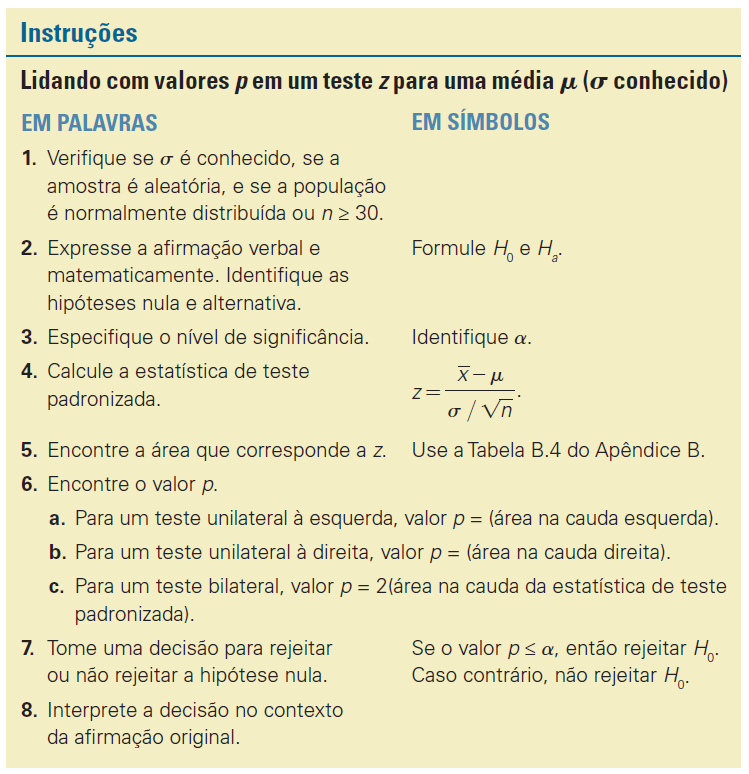

In [ ]:
def TH_media_z(x_barra=None, n_amostras=None, mu=None,
               sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - p_valor: valor p do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição amostral das médias
  dist_amostras = st.norm(loc=mu, scale=sigma/n_amostras**0.5)

  # Cálculo do p-valor, de acordo com o tipo de teste
  if teste == 'esquerda':
    p_valor = dist_amostras.cdf(x_barra)
    tipo = 'unilateral à esquerda'
  elif teste == 'direita':
    p_valor = dist_amostras.sf(x_barra)
    tipo = 'unilateral à direita'
  elif teste == 'bilateral':
    p_valor =  2*dist_amostras.cdf(x_barra)
    tipo = 'bilateral'

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
    print(f'Teste {tipo} com p-valor = {p_valor:.6f}')
    if p_valor <= alpha:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return p_valor

# Exercício 01 - Teste unilateral à esquerda

Em corrida de carros, o *pit stop* é aonde um veículo vai para trocar pneus, abastecer, efetuar reparos e outros ajustes mecânicos. A eficiência de uma equipe que realiza esses ajustes pode afetar o resultado de uma corrida.

Uma equipe afirma que seu tempo médio no *pit stop* (para 4 trocas de pneus e abastecimento) é menor que 13 segundos. Uma amostra aleatória de 32 tempos de *pit stop* tem uma média amostral de 12,9 segundos. Suponha que o desvio padrão populacional é de 0,19
segundos. Há evidência suficiente para concordar com a afirmação para $\alpha = 0,01$? Use um valor $p$.

In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 13 segundos
Ha: mu < 13 segundos (afirmação)
Tipo: unilateral à esquerda'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=12.9, n_amostras=32, mu=13, sigma=0.19,
                     alpha=0.01, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com p-valor = 0.001454
Hipótese nula rejeitada ao nível de significância 1.0%


In [ ]:
'''Conclusão: Há evidências estatísticas suficientes para corroborar a afirmação
de que os pit-stops duram menos de 13 segundos.'''

### Emulando um conjunto de dados para uso da função `ztest`

Vamos resolver o novamente o Exercício 01, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado.

Nessa situação, o teste de hipótese da média populacional será realizado pela função `ztest` do módulo `statsmodels.stats.weightstats`.

In [ ]:
# Bibliotecas
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

In [ ]:
# Caracterização da distribuição amostral das médias
media_pit = 12.9
std_pit = 0.19
amostras = 32
erro_padrao = std_pit/amostras**0.5

# Nível de significância do teste
alpha = 0.01

# Média populacional a ser testada
mu = 13

In [ ]:
# Criação do conjunto de dados aleatórios
data = std_pit*randn(amostras) + media_pit

# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} segundos')
print(f'Desvio padrão amostral = {np.std(data):.5f} segundos')

Média amostral = 12.90 segundos
Desvio padrão amostral = 0.18028 segundos


In [ ]:
# Teste de hipótese usando ztest
z_score, p_valor= ztest(x1=data, x2=None, value=mu, alternative='smaller')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = -4.00340
Valor p do teste de hipótese = 0.00003


In [ ]:
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 1.0%


# Exercício 02 - Teste unilateral à direita

Proprietários de casas afirmam que a velocidade média de veículos que passam por sua rua é maior que o limite de velocidade de 35 milhas por hora. Uma amostra aleatória de 100 automóveis tem uma média de
velocidade de 36 milhas por hora. Suponha que o desvio padrão populacional é de 4 milhas por hora. Há evidência suficiente para apoiar a afirmação para $\alpha = 0,05$? Use um valor $p$.

In [ ]:
''' Construção do teste de hipótese:
H0: mu <= 35 milhas por hora
Ha: mu > 35 milhas por hora (afirmação)
Tipo: unilateral à direita'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=36, n_amostras=100, mu=35, sigma=4,
                     alpha=0.05, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com p-valor = 0.006210
Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Há evidências estatísticas suficientes para corroborar a afirmação
de que a velocidade média dos veículos é superior a 35 milhas por hora.'''

### Emulando um conjunto de dados para uso da função `ztest`

Vamos resolver o novamente o Exercício 02, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado.

Nessa situação, o teste de hipótese da média populacional será realizado pela função `ztest` do módulo `statsmodels.stats.weightstats`.

In [ ]:
# Caracterização da distribuição amostral das médias
media_vel = 36
std_vel = 4
amostras = 100
erro_padrao = std_vel/amostras**0.5

# Nível de significância do teste
alpha = 0.05

# Média populacional a ser testada
mu = 35

In [ ]:
# Criação do conjunto de dados aleatórios
data = std_vel*randn(amostras) + media_vel

# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} mi/h')
print(f'Desvio padrão amostral= {np.std(data):.5f} mi/h')

Média amostral = 35.72 mi/h
Desvio padrão amostral= 4.10183 mi/h


In [ ]:
# Teste de hipótese usando ztest
z_score, p_valor= ztest(x1=data, x2=None, value=mu, alternative='larger')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = 1.75114
Valor p do teste de hipótese = 0.03996


In [ ]:
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 5.0%


# Exercício 03 - Teste bilateral

De acordo com um estudo, o custo médio de uma cirurgia bariátrica (perda de peso) é de US$\$$ 21.500. Você acha que essa informação está incorreta e então seleciona aleatoriamente 25 pacientes que realizaram a cirurgia e descobre que o custo médio de suas cirurgias é de US$\$$ 20.695.

De estudos anteriores, o desvio padrão populacional é conhecido, US$\$$ 2.250, e a população é normalmente distribuída. Há evidência suficiente para concordar com a afirmação para $\alpha = 0,05$? Use um valor
$p$ (Adaptado de: *The American Journal of Managed Care*).

In [ ]:
''' Construção do teste de hipótese:
H0: mu = 21500 dólares (afirmação)
Ha: mu != 21500 dólares
Tipo: bilateral'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=20695, n_amostras=25, mu=21500, sigma=2250,
                     alpha=0.05, teste='bilateral', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste bilateral com p-valor = 0.073633
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidências estatísticas suficientes para refutar a afirmação
de que o preço média da cirurgia bariátrica é de US$ 21.500,00.'''

### Emulando um conjunto de dados para uso da função `ztest`

Vamos resolver o novamente o Exercício 03, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado.

Nessa situação, o teste de hipótese da média populacional será realizado pela função `ztest` do módulo `statsmodels.stats.weightstats`.

In [ ]:
# Caracterização da distribuição amostral das médias
media_cirurgia = 20695
std_cirurgia = 2250
amostras = 25
erro_padrao = std_cirurgia/amostras**0.5

# Nível de significância do teste
alpha = 0.05

# Média populacional a ser testada
mu = 21500

In [ ]:
# Criação do conjunto de dados aleatórios
data = std_cirurgia*randn(amostras) + media_cirurgia

# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} dólares')
print(f'Desvio padrão amostral = {np.std(data):.5f} dólares')

Média amostral = 21020.26 dólares
Desvio padrão amostral = 2439.46014 dólares


In [ ]:
# Teste de hipótese usando ztest
z_score, p_valor= ztest(x1=data, x2=None, value=mu, alternative='two-sided')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = -0.96341
Valor p do teste de hipótese = 0.33534


In [ ]:
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 04 - Usando conjunto de dados

O arquivo `bp.txt` registra os batimentos por minuto de uma amostra de pacientes (retirada de um contingente bem maior) antes e depois do consumo de um novo medicamento sob teste. Ao nível de significância de 5%, investigue a afirmação:

"O valor médio dos batimentos cardíacos por minuto de todos os participantes do estudo antes do consumo do novo medicamento é, no mínimo, de 146 batimentos".

In [ ]:
# Download do conjunto de dados - arquivo bp.txt
%%capture
!gdown --id 1cWhFCT8oK--moMtD80laDoGcIy8d87-9

In [ ]:
import pandas as pd
# Importando os dados do arquivo bp.txt
coracao = pd.read_csv('bp.txt', sep='\t')
# Checando as primeiras linhas dos dados
display(coracao.head())

,patient_name,patient_ sex,patient_agegrp,patient_bp_before,patient_bp_after
0,1,Male,30-45,142,153
1,2,Male,30-45,163,170
2,3,Male,30-45,143,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 146 bpm (afirmação)
Ha: mu < 146 bpm
Tipo: unilateral à esquerda'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=coracao['patient_bp_before'].mean(),
                     n_amostras=len(coracao['patient_bp_before']),
                     mu=146, sigma=coracao['patient_bp_before'].std(ddof=1),
                     alpha=0.05, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com p-valor = 1.000000
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidências estatísticas suficientes para refutar a afirmação
de que o valor médio dos batimentos cardíacos por minuto dos participantes do
estudo antes do consumo do novo medicamento é, no mínimo, de 146 batimentos.'''

In [ ]:
# Teste de hipótese usando a função ztest
z_score, p_valor = ztest(x1=coracao['patient_bp_before'], x2=None,
                         value=146, alternative='smaller')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = 4.96027
Valor p do teste de hipótese = 1.00000


In [ ]:
# Conclusão do teste
alpha = 0.05
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 05 - Usando conjunto de dados

*Níveis de dióxido de nitrogênio.* Um cientista estima que o nível médio de dióxido de nitrogênio em Calgary é maior que 32 partes por bilhão. Você quer testar essa estimativa. Para isso, você determina os níveis
de dióxido de nitrogênio em 34 dias selecionados aleatoriamente. Os resultados (em partes por bilhão) estão listados na tabela a seguir.

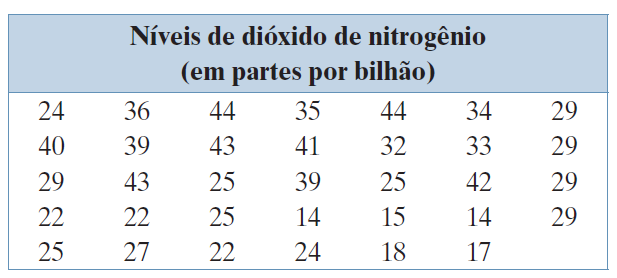

Suponha que o desvio
padrão populacional é de 9 partes por bilhão. Para o
nível de significância $\alpha = 0,06$, você pode concordar com a estimativa do cientista? (Adaptado de: *Clean Air Strategic Alliance*)

In [ ]:
# Dados relativos aos níveis de dióxido de carbono
NO2 = pd.Series([24, 36, 44, 35, 44, 34, 29, 40, 39, 43, 41, 32, 33, 29,
                 29, 43, 25, 39, 25, 42, 29, 22, 22, 25, 14, 15, 14, 29,
                 25, 27, 22, 24, 18, 17])

In [ ]:
''' Construção do teste de hipótese:
H0: mu <= 32 ppb
Ha: mu > 32 ppb (afirmação)
Tipo: unilateral à direita'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=NO2.mean(), n_amostras=len(NO2),
                     mu=32, sigma=9, alpha=0.06, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com p-valor = 0.933886
Hipótese nula NÃO rejeitada ao nível de significância 6.0%


In [ ]:
# Teste de hipótese usando a função ztest
z_score, p_valor = ztest(x1=NO2, x2=None, value=32, alternative='larger')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = -1.47840
Valor p do teste de hipótese = 0.93035


In [ ]:
# Conclusão do teste
alpha = 0.06
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula NÃO rejeitada ao nível de significância 6.0%


# **TTI109 - Estatística**
# **Aula 17 - Teste de Hipótese para a Média 02**

Nessa aula vamos aprender a:

* Determinar e região de rejeição da hipótese nula e o correspondente valor crítico em um teste de hipótese, dependendo do tipo de teste (unilateral à esquerda, unilateral à direita ou bilateral);
* Empregar o método das regiões de rejeição e valores críticos em um teste de hipótese.
* Construir e avaliar um teste de hipótese sobre a média populacional $\mu$ de uma distribuição, supondo que o desvio padrão populacional $\sigma$ seja conhecido.

# Função `TH_media_z` para o teste de hipótese da média

Desenvolvida na Aula 16, a função `TH_media_z` decide sobre a validade da hipótese nula ao comparar o p-valor da estatística de teste padronizada com o nível de significância do teste.

In [ ]:
def TH_media_z(x_barra=None, n_amostras=None, mu=None,
               sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - p_valor: valor p do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição amostral das médias
  dist_amostras = st.norm(loc=mu, scale=sigma/n_amostras**0.5)

  # Cálculo do p-valor, de acordo com o tipo de teste
  if teste == 'esquerda':
    p_valor = dist_amostras.cdf(x_barra)
    tipo = 'unilateral à esquerda'
  elif teste == 'direita':
    p_valor = dist_amostras.sf(x_barra)
    tipo = 'unilateral à direita'
  elif teste == 'bilateral':
    p_valor =  2*dist_amostras.cdf(x_barra)
    tipo = 'bilateral'

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
    print(f'Teste {tipo} com p-valor = {p_valor:.6f}')
    if p_valor <= alpha:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return p_valor

# Função `TH_media_z_regiao` para o teste de hipótese da média

A função `TH_media_z_regiao` decide sobre a validade da hipótese nula ao verificar se a estatística de teste padronizada está contida na região de rejeição do teste.

In [ ]:
def TH_media_z_regiao(x_barra=None, n_amostras=None, mu=None,
                      sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - z0: valor z crítico do teste de hipótese (fronteira da região de rejeição)'''

  from scipy import stats as st

  # Criação da distribuição normal padrão
  dist_padrao = st.norm(loc=0, scale=1)

  # Cálculo da estatística de teste padronizada
  z = (x_barra-mu)/(sigma/n_amostras**0.5)

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do z crítico, de acordo com o tipo de teste
  if teste == 'esquerda':
    z0 = dist_padrao.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if z <= z0:
      rejeicao = True
  elif teste == 'direita':
    z0 = dist_padrao.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if z >= z0:
      rejeicao = True
  elif teste == 'bilateral':
    z0 = dist_padrao.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de z à região de rejeição
    if (z <= z0) or (z >= -z0):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
     print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
     print(f'Teste {tipo} com z0 = {z0:.6f}')
     if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
     else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return z0

# Exercício 01

Funcionários de uma companhia de construção e mineração afirmam que o salário médio dos engenheiros mecânicos é menor que o de um de seus concorrentes, que é de $\$$ 68.000. Uma amostra aleatória de 20 engenheiros mecânicos da companhia tem um salário médio de $\$$ 66.900.

Suponha que o desvio padrão da população é de $\$$ 5.500 sendo esta normalmente distribuída. Para $\alpha = 0,05$, teste a afirmação dos
funcionários.

In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 68000 dólares
Ha: mu < 68000 dólares
Tipo: unilateral à esquerda'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=66900, n_amostras=20, mu=68000,
                     sigma=5500, alpha=0.05, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com p-valor = 0.185547
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
# Uso da função TH_media_z_região
z0 = TH_media_z_regiao(x_barra=66900, n_amostras=20, mu=68000, sigma=5500,
                        alpha=0.05, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com z0 = -1.644854
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidência suficiente ao nível de significância de 5% para
concordar com a afirmação dos funcionários de que o salário médio é menor que
68000 dólares.'''

# Exercício 02

O presidente da companhia do Exercício 01 afirma que o dia de trabalho médio dos engenheiros mecânicos é menor que 8,5 horas. Uma amostra aleatória de 25 dos engenheiros mecânicos da companhia tem um dia de trabalho médio de 8,2 horas.

Suponha que o desvio padrão populacional é de 0,5 hora e a população é normalmente distribuída. Para $\alpha = 0,01$, teste a afirmação do presidente.

In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 8.5 h
Ha: mu < 8.5 h (afirmação)
Tipo: unilateral à esquerda'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=8.2, n_amostras=25, mu=8.5, sigma=0.5,
                     alpha=0.01, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com p-valor = 0.001350
Hipótese nula rejeitada ao nível de significância 1.0%


In [ ]:
# Uso da função TH_media_z_regiao
z0 = TH_media_z_regiao(x_barra=8.2, n_amostras=25, mu=8.5, sigma=0.5,
                       alpha=0.01, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com z0 = -2.326348
Hipótese nula rejeitada ao nível de significância 1.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 1% para
concordar com a afirmação do presidente da companhia de que que o dia de
trabalho médio dos engenheiros mecânicos é menor que 8,5 horas.'''

# Exercício 03

Um pesquisador afirma que o custo médio anual para criar um filho (de 2 anos ou menos), nos Estados Unidos, é de US$\$$ 13.960. Em uma amostra aleatória de famílias no país, o custo médio anual para
criar um filho (2 anos de idade ou menos) é de US$\$$ 13.725. A amostra consiste em 500 crianças.

Suponha que o desvio padrão populacional é de US$\$$ 2.345. Para $\alpha = 0,10$, há evidência suficiente para rejeitar a
afirmação? (Adaptado de *U.S. Department of Agriculture Center for
Nutrition Policy and Promotion*)

In [ ]:
''' Construção do teste de hipótese:
H0: mu = 13960 dólares (afirmação)
Ha: mu != 13690 dólares
Tipo: bilateral'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=13725, n_amostras=500, mu=13960, sigma=2345,
                     alpha=0.1, teste='bilateral', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste bilateral com p-valor = 0.025037
Hipótese nula rejeitada ao nível de significância 10.0%


In [ ]:
# Uso da função TH_media_z_regiao
z0 = TH_media_z_regiao(x_barra=13725, n_amostras=500, mu=13960, sigma=2345,
                       alpha=0.1, teste='bilateral', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste bilateral com z0 = -1.644854
Hipótese nula rejeitada ao nível de significância 10.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 10% para
refutar a afirmação de que o custo médio anual para criar um filho
(de 2 anos ou menos), nos Estados Unidos, é de US$ 13.960.'''

# Exercício 04

A associação de Informação de Energia dos Estados Unidos afirma que o consumo médio mensal residencial de eletricidade em sua cidade é superior a 874 kWh. Você quer testar essa afirmação e reune uma amostra aleatória de 64 consumidores residenciais, com consumo médio mensal de eletricidade de 905 kWh.

Suponha que o desvio padrão populacional é de 125 kWh. Considerando nível de significância de 0,05, você tem evidência suficiente para apoiar afirmação da associação? (Adaptado de: *U.S. Energy Information Association*)

In [ ]:
''' Construção do teste de hipótese:
H0: mu <= 874 kWh
Ha: mu > 874 kWh (afirmação)
Tipo: unilateral à direita'''

In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=905, n_amostras=64, mu=874, sigma=125,
                     alpha=0.05, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com p-valor = 0.023628
Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
# Uso da função TH_media_z_regiao
z0 = TH_media_z_regiao(x_barra=905, n_amostras=64, mu=874, sigma=125,
                       alpha=0.05, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com z0 = 1.644854
Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 5% para
confirmar a afirmação de que o consumo médio mensal residencial de eletricidade
é superior a 874 kWh'''

# Exercício 05 - Usando conjunto de dados

*Lâmpadas fluorescentes.* Um fabricante de lâmpadas
fluorescentes garante que a vida útil média de
certo tipo de lâmpada é de pelo menos 10.000 horas.
Você quer testar essa garantia. Para fazer isso, você
registra as vidas de uma amostra aleatória de 32 lâmpadas fluorescentes. Os resultados (em horas) estão
listados a seguir.

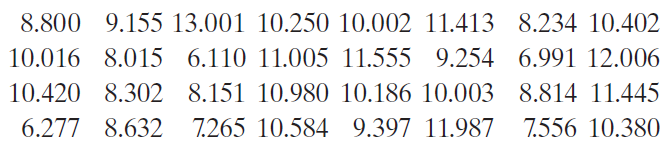

Suponha que o desvio padrão populacional é de 1.850 horas. Para o nível de significância $\alpha = 0,09$,
você tem evidência suficiente para rejeitar a afirmação
do fabricante?

In [ ]:
# Bibliotecas
from statsmodels.stats.weightstats import ztest
import pandas as pd

In [ ]:
# Dados relativos à vida útil de lâmpadas fluorescentes
lamps = pd.Series([8800, 9155, 13001, 10250, 10002, 11413, 8234, 10402,
                   10016, 8015, 6110, 11005, 9254, 6991, 12006,
                   10420, 8302, 8151, 10980, 10186, 10003, 8814, 11445,
                   6277, 8632, 7265, 10584, 9397, 11987, 7556, 10380])

In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 10000 horas (afirmação)
Ha: mu < 10000 horas
Tipo: unilateral à esquerda'''

In [ ]:
# Nível de significância
alpha = 0.09

# Teste de hipótese usando a função ztest
z_score, p_valor = ztest(x1=lamps, x2=None, value=10000, alternative='smaller')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste = {p_valor:.5f}')

Estatística padronizada: z = -1.57007
Valor p do teste = 0.05820


In [ ]:
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 9.0%


In [ ]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=lamps.mean(), n_amostras=len(lamps), mu=10000,
                     sigma=1850, alpha=0.09, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com p-valor = 0.073104
Hipótese nula rejeitada ao nível de significância 9.0%


In [ ]:
# Uso da função TH_media_z_regiao
z0 = TH_media_z_regiao(x_barra=lamps.mean(), n_amostras=len(lamps), mu=10000,
                       sigma=1850, alpha=0.09, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com z0 = -1.340755
Hipótese nula rejeitada ao nível de significância 9.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 9% para
refutar a afirmação de que a vida útil média das lâmpada é de pelo menos
10.000 horas'''

# **TTI109 - Estatística**
# **Aula 18 - Teste de Hipótese para a Média 03**

Nessa aula vamos aprender a:

* Determinar a região de rejeição da hipótese nula e o correspondente valor crítico da distribuição $t$ em um teste de hipótese, dependendo do tipo de teste (unilateral à esquerda, unilateral à direita ou bilateral);
* Avaliar as situações em que é possível testar a média populacional sem o conhecimento do desvio padrão, a saber: a população tem distribuição normal ou a amostra coletada tem mais de 30 indivíduos;
* Construir e avaliar um teste de hipótese sobre a média populacional $\mu$ de uma distribuição em que o desvio padrão populacional $\sigma$ não é conhecido.

# Valores críticos em uma distribuição *t*

**(a)** Encontre o valor crítico $t_0$ para um teste unilateral à esquerda com
$\alpha = 0,05$ e $n = 21$.

In [ ]:
# Biblioteca
import scipy.stats as st

In [ ]:
alpha, n = 0.05, 21
dist_t = st.t(df=n-1)
t0 = dist_t.ppf(alpha)
print(f'Teste unilateral à esquerda com alpha = {alpha*100}%')
print(f'Valor crítico t0 = {t0:.5f}')

Teste unilateral à esquerda com alpha = 5.0%
Valor crítico t0 = -1.72472


**(b)** Encontre o valor crítico $t_0$ para um teste unilateral à direita com
$\alpha = 0,01$ e $n = 17$.

In [ ]:
alpha, n = 0.01, 17
dist_t = st.t(df=n-1)
t0 = dist_t.ppf(1-alpha)
print(f'Teste unilateral à direita com alpha = {alpha*100}%')
print(f'Valor crítico t0 = {t0:.5f}')

Teste unilateral à direita com alpha = 1.0%
Valor crítico t0 = 2.58349


**(c)** Encontre os valores críticos $–t_0$ e $t_0$ para um teste bilateral com
$\alpha = 0,10$ e $n = 26$.

In [ ]:
alpha, n = 0.10, 26
dist_t = st.t(df=n-1)
t0 = dist_t.ppf(alpha/2)
print(f'Teste bilateral com alpha = {alpha*100}%')
print(f'Valores críticos -t0 = {-t0:.5f} e t0 = {t0:.5f}')

Teste bilateral com alpha = 10.0%
Valores críticos -t0 = 1.70814 e t0 = -1.70814


# Função `TH_media_t` para o teste de hipótese da média

A função `TH_media_t` decide sobre a validade da hipótese nula ao comparar o p-valor da estatística de teste padronizada com o nível de significância do teste.

In [ ]:
def TH_media_t(x_barra=None, n_amostras=None, mu=None, s=None,
               alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média mu, com nível de significância
     alpha, supondo desvio padrão populacional sigma desconhecido.
     ENTRADA:
     - x_barra: média amostral
     - n_amostras: número de amostras coletadas no experimento
     - mu: hipótese nula para a média populacional
     - s: desvio padrão amostral
     - alpha: nível de significância adotado no teste (valor default 0.05)
     - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
     para teste unilateral à esquerda, 'direita', para teste unilateral à direita
     e 'bilateral' para teste bilateral (valor default 'esquerda')
     - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
     (valor default=True)
     SAÍDA:
     - relatório de conclusão do teste de hipótese, caso cocnlusao=True
     - t0: valor crítico do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição t
  dist_t = st.t(df=n_amostras-1)

  # Cálculo da estatística de teste padronizada
  t = (x_barra-mu)/(s/n_amostras**0.5)

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do t crítico (t0), de acordo com o tipo de teste
  if teste == 'esquerda':
    t0 = dist_t.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de t à região de rejeição
    if t <= t0:
      rejeicao = True
  elif teste == 'direita':
    t0 = dist_t.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de t à região de rejeição
    if t >= t0:
      rejeicao = True
  elif teste == 'bilateral':
    t0 = dist_t.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de t à região de rejeição
    if (t <= t0) or (t >= -t0):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***')
    print(f'Teste {tipo} com t0 = {t0:.5f}')
    if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return t0

# Exercício 01 - Teste unilateral à esquerda

Um vendedor de carros usados diz que o preço médio do sedan de dois anos (em boas condições) é de pelo menos US$\$$ 20.500. Você suspeita que essa afirmação é incorreta e descobre que uma amostra aleatória de 14 veículos similares tem um preço médio de US$\$$ 19.850 e desvio padrão de US$\$$ 1.084.

Há evidência suficiente para rejeitar a afirmação do vendedor para o nível de significância a = 0,05? Suponha que a população é normalmente distribuída (Adaptado de: *Kelley Blue Book*).

In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 20500 dólares (afirmação)
Ha: mu < 20500 dólares
Tipo: unilateral à esquerda'''

In [ ]:
# Uso da função TH_media_t
t0 = TH_media_t(x_barra=19850, n_amostras=14, mu=20500, s=1084,
                alpha=0.05, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***
Teste unilateral à esquerda com t0 = -1.77093
Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 5% para
rejeitar a afirmação do vendedor de que o preço médio dos sedan é de pelo menos
20500 dólares.'''

### Emulando um conjunto de dados para uso da função `ttest_1samp`

Vamos resolver o novamente o Exercício 01, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado. O teste de hipótese será realizado pela função `ttest_1samp` do módulo `scipy.stats`.

ATENÇÃO: A função `ttest_1samp` retorna a estatística padronizada `t` e o valor-p. Assim, podemos decidir sobre a hipótese nula usando a região de rejeição ou comparando o valor-p com a nível de significância $\alpha$.

In [ ]:
# Bibliotecas
import numpy as np
from numpy.random import randn

In [ ]:
# Caracterização da distribuição amostral das médias
media_preco = 19850
std_preco = 1084
amostras = 14
erro_padrao = std_preco/amostras**0.5

In [ ]:
# Nível de significância do teste
alpha = 0.05
# Média populacional a ser testada
mu = 20500

In [ ]:
# Criação do conjunto de dados aleatórios
data = std_preco*randn(amostras) + media_preco
# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} ; Desvio padrão = {np.std(data):.5f}')

Média amostral = 19898.99 ; Desvio padrão = 1081.43957


In [ ]:
# Teste de hipótese usando ttest_1samp
t0, p_valor = st.ttest_1samp(a=data, popmean=mu, alternative='less')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 5.0%


# Exercício 02 - Teste unilateral à direita

Um agente de seguros diz que o custo médio do seguro do sedan de dois anos (em boas condições) é maior que US$\$$ 1.200. Uma amostra aleatória de 7 cotações de seguro similares tem um custo médio de US$\$$ 1.275 e um desvio padrão de US$\$$ 55.

Há evidência suficiente para concordar com afirmação do agente considerando nível de significância de 0,10? Suponha que a população é normalmente distribuída.

In [ ]:
''' Construção do teste de hipótese:
H0: mu <= 1200 dólares
Ha: mu > 1200 dólares (afirmação)
Tipo: unilateral à direita'''

In [ ]:
# Uso da função TH_media_t
t0 = TH_media_t(x_barra=1275, n_amostras=7, mu=1200, s=55,
                alpha=0.1, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***
Teste unilateral à direita com t0 = 1.43976
Hipótese nula rejeitada ao nível de significância 10.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 10% para
concordar com a afirmação do agente de que valor médio dos seguros dos sedans é
maior do que 1200 dólares.'''

### Emulando um conjunto de dados para uso da função `ttest_1samp`

Vamos resolver o novamente o Exercício 02, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado. O teste de hipótese será realizado pela função `ttest_1samp` do módulo `scipy.stats`.

In [ ]:
# Caracterização da distribuição amostral das médias
media_seguro = 1275
std_seguro = 55
amostras = 7
erro_padrao = std_seguro/amostras**0.5

In [ ]:
# Nível de significância do teste
alpha = 0.1
# Média populacional a ser testada
mu = 1200

In [ ]:
# Criação do conjunto de dados aleatórios
data = std_seguro*randn(amostras) + media_seguro
# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} ; Desvio padrão = {np.std(data):.5f}')

Média amostral = 1294.17 ; Desvio padrão = 53.91064


In [ ]:
# Teste de hipótese usando ttest_1samp
t0, p_valor = st.ttest_1samp(a=data, popmean=mu, alternative='greater')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 10.0%


# Exercício 03 - Teste bilateral

Uma indústria afirma que o nível médio do pH da água em um rio próximo é de 6,8. Você seleciona aleatoriamente 39 amostras de água e mede o pH de cada uma. A média amostral e o desvio padrão são de 6,7 e 0,35, respectivamente.

Há evidência suficiente para rejeitar a afirmação da indústria considerando nível de significância $\alpha = 0,05$?

In [ ]:
''' Construção do teste de hipótese:
H0: mu = 6.8 (afirmação)
Ha: mu != 6.8
Tipo: bilateral'''

In [ ]:
# Uso da função TH_media_t
t0 = TH_media_t(x_barra=6.7, n_amostras=39, mu=6.8, s=0.35,
                alpha=0.05, teste='bilateral', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***
Teste bilateral com t0 = -2.02439
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidência suficiente ao nível de significância de 5% para
rejeitar a afirmação de que o pH médio da água do rio é de 6,8.'''

### Emulando um conjunto de dados para uso da função `ttest_1samp`

Vamos resolver o novamente o Exercício 03, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado. O teste de hipótese será realizado pela função `ttest_1samp` do módulo `scipy.stats`.

In [ ]:
# Caracterização da distribuição amostral das médias
media_pH = 6.7
std_pH = 0.35
amostras = 39
erro_padrao = std_pH/amostras**0.5

In [ ]:
# Nível de significância do teste
alpha = 0.05
# Média populacional a ser testada
mu = 6.8

In [ ]:
# Criação do conjunto de dados aleatórios
data = std_pH*randn(amostras) + media_pH
# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} ; Desvio padrão = {np.std(data):.5f}')

Média amostral = 6.68 ; Desvio padrão = 0.41202


In [ ]:
# Teste de hipótese usando ttest_1samp
t0, p_valor = st.ttest_1samp(a=data, popmean=mu, alternative='two-sided')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 04 - Usando um conjunto de dados

*Tamanho da turma.* Você recebe um folheto de uma grande universidade. O folheto indica que o tamanho médio das turmas para cursos integrais é menor que 32 alunos. Você quer testar essa afirmação e seleciona aleatoriamente 18 turmas de tempo integral e determina o tamanho de cada uma. Os resultados estão listados na tabela seguinte.

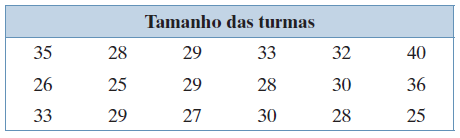

Considerando o nível de significância de $\alpha = 0,05$, você pode concordar com a afirmação da universidade?

In [ ]:
import pandas as pd
# Dados relativos ao tamanho das turmas
turmas = pd.Series([35, 28, 29, 33, 32, 40, 26, 25, 29,
                    28, 30, 36, 33, 29, 27, 30, 28, 25])

In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 32 alunos
Ha: mu < 32 alunos (afirmação)
Tipo: unilateral à esquerda'''

In [ ]:
# Nível de significância
alpha = 0.05

# Teste de hipótese usando a função ttest_1samp
t0, p_valor = st.ttest_1samp(a=turmas, popmean=32, alternative='less')

# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
# Uso da função TH_media_t
t0 = TH_media_t(x_barra=turmas.mean(), n_amostras=len(turmas), mu=32,
                s=turmas.std(ddof=1), alpha=0.05, teste='esquerda',
                conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão desconhecido) ***
Teste unilateral à esquerda com t0 = -1.73961
Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 5% para
concordar com a afirmação da universidade de que as turmas de tempo integral
possuem menos de 32 alunos.'''

# **TTI109 - Estatística**
# **Aula 19 - Teste de Hipótese para a Variância e Desvio Padrão**

Nessa aula vamos aprender a:

* Empregar uma distribuição $\chi^2$ com $n-1$ graus de liberdade para testar a variância e o desvio padrão de uma população normalmente distribuída;
* Determinar os valores críticos $\chi^2$ em um teste de hipótese, dependendo do tipo de teste (unilateral à esquerda, unilateral à direita ou bilateral);
* Construir e avaliar um teste de hipótese sobre a variância $\sigma^2$ e o desvio padrão $\sigma$ de uma população normalmente distribuída.

# Valores críticos em uma distribuição $\chi^2$

**(a)** Encontre o valor crítico $\chi^2_0$ para um teste unilateral à direita com $\alpha = 0,10$ e $n = 26$.

In [ ]:
# Biblioteca
import scipy.stats as st

In [ ]:
alpha, n = 0.10, 26
dist_chi2 = st.chi2(df=n-1)
X20 = dist_chi2.ppf(1-alpha)
print(f'Teste unilateral à direita com alpha = {alpha*100}%')
print(f'Valor crítico X20 = {X20:.5f}')

Teste unilateral à direita com alpha = 10.0%
Valor crítico X20 = 34.38159


**(b)** Encontre o valor crítico $\chi^2_0$ para um teste unilateral à esquerda com
$\alpha = 0,01$ e $n = 11$.

In [ ]:
alpha, n = 0.01, 11
dist_chi2 = st.chi2(df=n-1)
X20 = dist_chi2.ppf(alpha)
print(f'Teste unilateral à esquerda com alpha = {alpha*100}%')
print(f'Valor crítico X20 = {X20:.5f}')

Teste unilateral à esquerda com alpha = 1.0%
Valor crítico X20 = 2.55821


**(c)** Encontre os valores críticos $\chi^2_L$ e $\chi^2_R$ para um teste bilateral com $\alpha = 0,05$ e $n = 9$.

In [ ]:
alpha, n = 0.05, 9
dist_chi2 = st.chi2(df=n-1)
X2L = dist_chi2.ppf(alpha/2)
X2R = dist_chi2.ppf(1-alpha/2)
print(f'Teste bilateral com alpha = {alpha*100}%')
print(f'Valores críticos X2L = {X2L:.5f} e X2R = {X2R:.5f}')

Teste bilateral com alpha = 5.0%
Valores críticos X2L = 2.17973 e X2R = 17.53455


# Função `TH_vardp_chi2` para o teste de hipótese da variância e desvio padrão

A função `TH_vardp_chi2` decide sobre a validade da hipótese nula ao verificar se o(s) valor(es) crítico(s) qui-quadrado pertencem à região de rejeição.

In [ ]:
def TH_vardp_chi2(est_amostral=None, n_amostras=None, val_parametro=None,
                  parametro='sigma', alpha=0.05, teste='esquerda',
                  conclusao=True):
  '''Função para teste de hipótese da variância ou do desvio padrão populacional,
  com nível de significância alpha.
  ENTRADA:
  - est_amostral: variância ou desvio padrão amostral
  - n_amostras: número de amostras coletadas no experimento
  - val_parametro = valor a ser testado, seja variância ou desvio padrão
  - parametro = 'sigma2' para teste de variância e 'sigma' para teste de
  desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAÍDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - chi2: valor da estatística padronizada
  - X20: valor(es) crítico(s) do teste'''

  # Criação da distribuição chi-quadrado
  dist_chi2 = st.chi2(df=n_amostras-1)

  # Cálculo da estatística de teste padronizada
  if parametro == 'sigma2':
    chi2 = (n_amostras-1)*est_amostral/val_parametro
    param = 'variância'
  elif parametro == 'sigma':
    chi2 = (n_amostras-1)*est_amostral**2/val_parametro**2
    param = 'desvio padrão'

  # Hipótese nula inicialmente validada
  rejeicao = False

  # Cálculo do chi2 crítico, de acordo com o tipo de teste
  if teste == 'esquerda':
    X20 = dist_chi2.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de X20 à região de rejeição
    if chi2 <= X20:
      rejeicao = True
  elif teste == 'direita':
    X20 = dist_chi2.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de X20 à região de rejeição
    if chi2 >= X20:
      rejeicao = True
  elif teste == 'bilateral':
    X2L = dist_chi2.ppf(alpha/2)
    X2R = dist_chi2.ppf(1-alpha/2)
    tipo = 'bilateral'
    X20 = (X2L, X2R)
    # Decisão sobre pertinência de X20 à região de rejeição
    if (chi2 <= X2L) or (chi2 >= X2R):
      rejeicao = True

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print(f'*** Teste de hipótese para {param} populacional ***')
    print(f'Teste {tipo} com:')
    print(f'Estatística de teste padronizada = {chi2:.4f}')
    if isinstance(X20, tuple):
      print(f'Valores chi-quadrado críticos X2L = {X20[0]:.4f} e X2R = {X20[1]:.4f}')
    else:
      print(f'Valor chi-quadrado crítico = {X20:.4f}')
    if rejeicao:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return chi2, X20

# Exercício 01

Uma empresa de processamento de laticínios afirma que a variância da quantidade de gordura no leite integral processado por ela é não mais que 0,25. Você suspeita que essa afirmação esteja errada e descobre que uma amostra aleatória de 41 recipientes de leite tem uma
variância de 0,27.

Para um nível de significância $\alpha = 0,05$, há evidência suficiente para rejeitar a afirmação da empresa? Suponha que a população é normalmente distribuída.

In [ ]:
''' Construção do teste de hipótese:
H0: sigma2 <= 0.25 (afirmação)
Ha: sigma2 > 0.25
Tipo: unilateral à direita'''

' Construção do teste de hipótese:\nH0: sigma2 <= 0.25 (afirmação)\nHa: sigma2 > 0.25\nTipo: unilateral à direita'

In [ ]:
# Uso da função TH_vardp_chi2
est_teste, X2critico = TH_vardp_chi2(est_amostral=0.27, n_amostras=41,
                                     val_parametro=0.25, parametro='sigma2',
                                     alpha=0.05, teste='direita',
                                     conclusao=True)

*** Teste de hipótese para variância populacional ***
Teste unilateral à direita com:
Estatística de teste padronizada = 43.2000
Valor chi-quadrado crítico = 55.7585
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Ná há evidência suficiente ao nível de significância de 5% para
rejeitar a afirmação da empresa de que a variância da quantidade de gordura no
leite integral é não mais que 0,25.'''

'Conclusão: Ná há evidência suficiente ao nível de significância de 5% para\nrejeitar a afirmação da empresa de que a variância da quantidade de gordura no\nleite integral é não mais que 0,25.'

# Exercício 02

Uma empresa afirma que o desvio padrão do tempo de duração de uma ligação recebida para ser transferida para a área correta é menor que 1,4 minuto. Uma amostra aleatória de 25 ligações recebidas tem um desvio padrão de 1,1 minuto.

Para o nível de significância $\alpha = 0,10$,
há evidência suficiente para concordar com a afirmação da empresa? Suponha que a população é normalmente distribuída.

In [ ]:
''' Construção do teste de hipótese:
H0: sigma >= 1.4 min
Ha: sigma < 1.4 min (afirmação)
Tipo: unilateral à esquerda'''

' Construção do teste de hipótese:\nH0: sigma >= 1.4 min\nHa: sigma < 1.4 min (afirmação)\nTipo: unilateral à esquerda'

In [ ]:
# Uso da função TH_vardp_chi2
est_teste, X2critico = TH_vardp_chi2(est_amostral=1.1, n_amostras=25,
                                     val_parametro=1.4, parametro='sigma',
                                     alpha=0.1, teste='esquerda',
                                     conclusao=True)

*** Teste de hipótese para desvio padrão populacional ***
Teste unilateral à esquerda com:
Estatística de teste padronizada = 14.8163
Valor chi-quadrado crítico = 15.6587
Hipótese nula rejeitada ao nível de significância 10.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 10% para
concordar com a afirmação de que o desvio padrão do tempo de duração de uma
ligação recebida para ser transferida para a área correta é menor que
1,4 minutos.'''

'Conclusão: Há evidência suficiente ao nível de significância de 10% para\nconcordar com a afirmação de que o desvio padrão do tempo de duração de uma\nligação recebida para ser transferida para a área correta é menor que\n1,4 minutos.'

# Exercício 03

Um fabricante de artigos esportivos afirma que a variância da força de uma certa linha de pesca é de 15,9. Uma amostra aleatória de 15 rolos de linha tem uma variância de 21,8.

Para o nível de significância $\alpha = 0,05$, há evidência suficiente para rejeitar a afirmação do fabricante? Suponha que a população é normalmente distribuída.

In [ ]:
''' Construção do teste de hipótese:
H0: sigma2 = 15.9 (afirmação)
Ha: sigma2 != 15.9
Tipo: bilateral'''

' Construção do teste de hipótese:\nH0: sigma2 = 15.9 (afirmação)\nHa: sigma2 != 15.9\nTipo: bilateral'

In [ ]:
# Uso da função TH_vardp_chi2
est_teste, X2critico = TH_vardp_chi2(est_amostral=21.8, n_amostras=15,
                                     val_parametro=15.9, parametro='sigma2',
                                     alpha=0.05, teste='bilateral',
                                     conclusao=True)

*** Teste de hipótese para variância populacional ***
Teste bilateral com:
Estatística de teste padronizada = 19.1950
Valores chi-quadrado críticos X2L = 5.6287 e X2R = 26.1189
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidência suficiente ao nível de significância de 5% para
rejeitar a afirmação do fabricante de que a variância da força da linha de
pesca é de 15,9.'''

# Exercício 04

Um chefe de polícia afirma que o desvio padrão dos tempos de resposta é menor que 3,7 minutos. Uma amostra aleatória de 9 tempos de resposta tem um desvio padrão de 3,0 minutos.

Para o nível de significância $\alpha = 0,05$, há evidência suficiente para concordar com a afirmação do chefe de polícia? Suponha que a população é normalmente
distribuída.

In [ ]:
''' Construção do teste de hipótese:
H0: sigma >= 3.7 min
Ha: sigma < 3.7 min (afirmação)
Tipo: unilateral à esquerda'''

In [ ]:
# Uso da função TH_vardp_chi2
est_teste, X2critico = TH_vardp_chi2(est_amostral=3.0, n_amostras=9,
                                     val_parametro=3.7, parametro='sigma',
                                     alpha=0.05, teste='esquerda',
                                     conclusao=True)

*** Teste de hipótese para desvio padrão populacional ***
Teste unilateral à esquerda com:
Estatística de teste padronizada = 5.2593
Valor chi-quadrado crítico = 2.7326
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidência suficiente ao nível de sigificância de 5% para
concordar com a afirmação do chefe de polícia que o desvio padrão dos tempos
de resposta é menor que 3,7 minutos.'''

# Exercício 05

Uma empresa que oferece produtos dietéticos e serviços de perda de peso afirma que a variância das perdas de peso de seus usuários é de 25,5. Uma amostra aleatória de 13 usuários tem uma variância de 10,8.

Para o nível de significância a = 0,10, há evidência suficiente para rejeitar a afirmação da empresa? Suponha que a população é normalmente distribuída.

In [ ]:
''' Construção do teste de hipótese:
H0: sigma2 = 25.5 (afirmação)
Ha: sigma2 != 25.5
Tipo: bilateral'''

In [ ]:
# Uso da função TH_vardp_chi2
est_teste, X2critico = TH_vardp_chi2(est_amostral=10.8, n_amostras=13,
                                     val_parametro=25.5, parametro='sigma2',
                                     alpha=0.10, teste='bilateral',
                                     conclusao=True)

*** Teste de hipótese para variância populacional ***
Teste bilateral com:
Estatística de teste padronizada = 5.0824
Valores chi-quadrado críticos X2L = 5.2260 e X2R = 21.0261
Hipótese nula rejeitada ao nível de significância 10.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 10% para
rejeitar a afirmação da empresa de que a variância das perdas de peso de seus
usuários é de 25,5.'''

# Exercício 06

O salário anual (em dólares) de 14 bombeiros escolhidos aleatoriamente está listado a seguir.

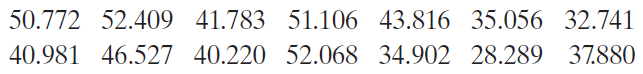

Para o nível de significância $\alpha = 0,05$, há evidência suficiente para concordar com a afirmação de que o desvio padrão dos salários anuais é diferente de US$ 5.500? (Adaptado de: *Salary.com*)

In [ ]:
import pandas as pd

# Conjunto de dados
salarios = pd.Series([50772, 52409, 41783, 51106, 43816, 35056, 32741,
                      40981, 46527, 40220, 52068, 34902, 28289, 37880])

In [ ]:
''' Construção do teste de hipótese:
H0: sigma = 5500 dólares
Ha: sigma != 5500 dólares (afirmação)
Tipo: bilateral'''

In [ ]:
# Uso da função TH_vardp_chi2
est_teste, X2critico = TH_vardp_chi2(est_amostral=salarios.std(ddof=1),
                                     n_amostras=len(salarios),
                                     val_parametro=5500, parametro='sigma',
                                     alpha=0.05, teste='bilateral',
                                     conclusao=True)

*** Teste de hipótese para desvio padrão populacional ***
Teste bilateral com:
Estatística de teste padronizada = 26.0132
Valores chi-quadrado críticos X2L = 5.0088 e X2R = 24.7356
Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Há evidência suficiente ao nível de significância de 10% para
concordar com a afirmação de que o desvio padrão dos salários anuais é
diferente de US$ 5.500.'''